## Part C — Comprehensive Analysis



Purpose: Hyperparameter analysis and model comparison (Logistic, Softmax, Neural Network) on MNIST. This notebook reuses code from Part A and Part B provided by the student.


## Instructions

This notebook expects the DataLoaders train_loader, val_loader, test_loader (flattened 28x28 -> 784) to be defined in the environment. It also uses the provided model implementations (Logistic, Softmax, CustomFeedforwardNN) and training helpers.

Run cells in order.

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import random
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import os , sys
## uncomment this if you are running on vs code
# sys.path.append(os.path.abspath("../"))
# from src.logisitc_manual import LogisticRegression
# from src.softmax_manual import SoftmaxRegression
# from src.nn_manual import *
# from src.data_preprocessing import *


# For reproducibility
SEED = 42
torch.manual_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)

In [2]:
# comment if you are on vs code
from google.colab import files
uploaded = files.upload()
from logisitc_manual import LogisticRegression
from softmax_manual import SoftmaxRegression
from data_preprocessing import *
from nn_manual import *

Saving data_preprocessing.py to data_preprocessing.py
Saving logisitc_manual.py to logisitc_manual.py
Saving nn_manual.py to nn_manual.py
Saving softmax_manual.py to softmax_manual.py


# Data Loading and Preprocessing

### For Logisitc Regression (Class 0 vs 1)

In [3]:
binary_data = MNISTDataLoader(batch_size=32, binary=True, digits=(0, 1))
train_loader_bin, val_loader_bin, test_loader_bin = binary_data.get_loaders()

100%|██████████| 9.91M/9.91M [00:00<00:00, 56.5MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.78MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 14.1MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 9.80MB/s]


## For Softmax Regression and NN

In [4]:
multi_data = MNISTDataLoader(batch_size=32, binary=False)
train_loader, val_loader, test_loader = multi_data.get_loaders()

## C1 — Hyperparameter Analysis

### C1.1 Learning Rate Analysis



=== LR = 0.001 ===
Epoch 1/20 Train Loss: 2.0104 Train Acc: 0.3863 Val Loss: 1.6531 Val Acc: 0.6326
Epoch 2/20 Train Loss: 1.3192 Train Acc: 0.7138 Val Loss: 1.0431 Val Acc: 0.7699
Epoch 3/20 Train Loss: 0.8801 Train Acc: 0.7947 Val Loss: 0.7541 Val Acc: 0.8209
Epoch 4/20 Train Loss: 0.6778 Train Acc: 0.8332 Val Loss: 0.6136 Val Acc: 0.8482
Epoch 5/20 Train Loss: 0.5704 Train Acc: 0.8561 Val Loss: 0.5319 Val Acc: 0.8632
Epoch 6/20 Train Loss: 0.5037 Train Acc: 0.8691 Val Loss: 0.4777 Val Acc: 0.8744
Epoch 7/20 Train Loss: 0.4580 Train Acc: 0.8783 Val Loss: 0.4394 Val Acc: 0.8809
Epoch 8/20 Train Loss: 0.4249 Train Acc: 0.8855 Val Loss: 0.4110 Val Acc: 0.8881
Epoch 9/20 Train Loss: 0.3994 Train Acc: 0.8917 Val Loss: 0.3894 Val Acc: 0.8923
Epoch 10/20 Train Loss: 0.3793 Train Acc: 0.8966 Val Loss: 0.3710 Val Acc: 0.8974
Epoch 11/20 Train Loss: 0.3627 Train Acc: 0.9003 Val Loss: 0.3567 Val Acc: 0.9000
Epoch 12/20 Train Loss: 0.3491 Train Acc: 0.9031 Val Loss: 0.3448 Val Acc: 0.9044
Epoch

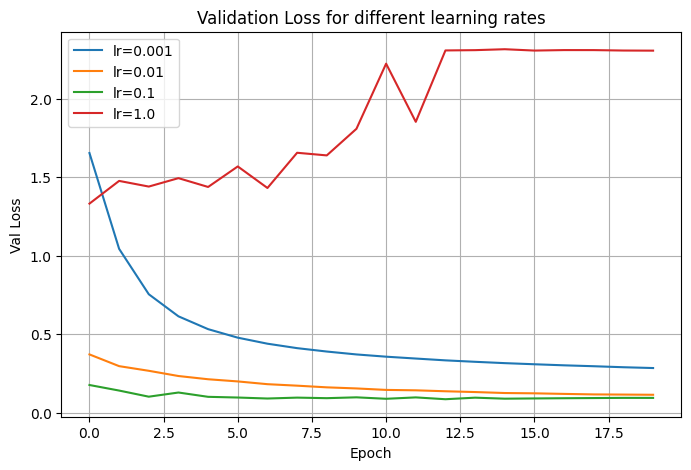

,lr,final_val_acc
0,0.001,0.921643
1,0.010,0.966357
2,0.100,0.978214
3,1.000,0.112500


In [7]:
learning_rates = [0.001, 0.01, 0.1, 1.0]
num_epochs = 20
batch_size = 64
results_lr = []
for lr in learning_rates:
    print(f"\n=== LR = {lr} ===")
    # ensure we use DataLoaders with the chosen batch size
    # If your original train_loader has different batch size, recreate it from tensors if available
    # Here we assume train_loader and val_loader accept any batch sizes; if not, recreate from TensorDataset.
    model = CustomFeedforwardNN()
    tl, vl, ta, va = train_model_once(model, train_loader, val_loader, epochs=num_epochs, learning_rate=lr)
    results_lr.append({'lr': lr, 'train_losses': tl, 'val_losses': vl, 'train_acc': ta, 'val_acc': va})

# Plot validation loss comparison
plt.figure(figsize=(8,5))
for res in results_lr:
    plt.plot(res['val_losses'], label=f"lr={res['lr']}")
plt.xlabel('Epoch'); plt.ylabel('Val Loss'); plt.title('Validation Loss for different learning rates'); plt.legend(); plt.grid(True); plt.show()

# Summarize final val accuracy
pd.DataFrame([{'lr': r['lr'], 'final_val_acc': r['val_acc'][-1]} for r in results_lr])


### C1.2 Batch Size Analysis



=== Batch size = 16 ===
Epoch 1/20 Train Loss: 0.7762 Train Acc: 0.7911 Val Loss: 0.3780 Val Acc: 0.8954
Epoch 2/20 Train Loss: 0.3345 Train Acc: 0.9046 Val Loss: 0.2987 Val Acc: 0.9149
Epoch 3/20 Train Loss: 0.2796 Train Acc: 0.9189 Val Loss: 0.2711 Val Acc: 0.9212
Epoch 4/20 Train Loss: 0.2460 Train Acc: 0.9293 Val Loss: 0.2415 Val Acc: 0.9304
Epoch 5/20 Train Loss: 0.2200 Train Acc: 0.9369 Val Loss: 0.2158 Val Acc: 0.9371
Epoch 6/20 Train Loss: 0.1993 Train Acc: 0.9434 Val Loss: 0.2123 Val Acc: 0.9359
Epoch 7/20 Train Loss: 0.1820 Train Acc: 0.9478 Val Loss: 0.1901 Val Acc: 0.9419
Epoch 8/20 Train Loss: 0.1668 Train Acc: 0.9521 Val Loss: 0.1814 Val Acc: 0.9466
Epoch 9/20 Train Loss: 0.1537 Train Acc: 0.9554 Val Loss: 0.1635 Val Acc: 0.9509
Epoch 10/20 Train Loss: 0.1422 Train Acc: 0.9591 Val Loss: 0.1581 Val Acc: 0.9529
Epoch 11/20 Train Loss: 0.1323 Train Acc: 0.9622 Val Loss: 0.1584 Val Acc: 0.9532
Epoch 12/20 Train Loss: 0.1229 Train Acc: 0.9652 Val Loss: 0.1467 Val Acc: 0.9558


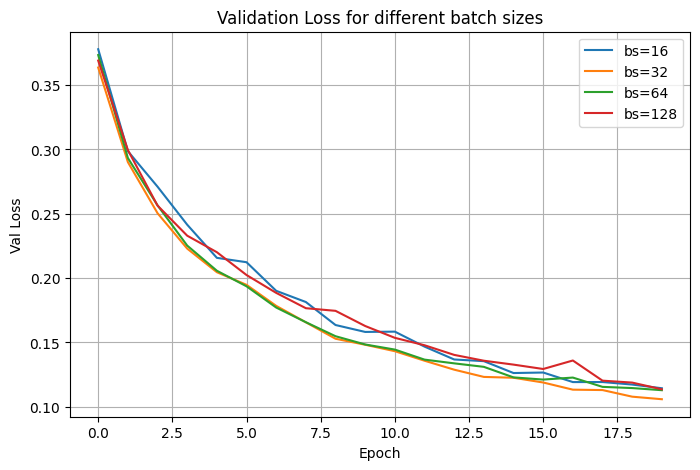

,batch_size,final_val_acc,time_s
0,16,0.964571,65.782968
1,32,0.968429,66.246249
2,64,0.965500,68.016658
3,128,0.965357,65.514758


In [8]:
batch_sizes = [16, 32, 64, 128]
num_epochs = 20
results_bs = []
# If tensors for X_train_flat etc exist, recreate DataLoaders with different batch sizes
try:
    X_train_flat
    recreate_loaders = True
except NameError:
    recreate_loaders = False

for bs in batch_sizes:
    print(f"\n=== Batch size = {bs} ===")
    if recreate_loaders:
        train_loader_bs = DataLoader(TensorDataset(X_train_flat, y_train), batch_size=bs, shuffle=True)
        val_loader_bs = DataLoader(TensorDataset(X_val_flat, y_val), batch_size=bs, shuffle=False)
    else:
        train_loader_bs = train_loader; val_loader_bs = val_loader
    model = CustomFeedforwardNN()
    start = time.time()
    tl, vl, ta, va = train_model_once(model, train_loader_bs, val_loader_bs, epochs=num_epochs, learning_rate=0.01)
    duration = time.time() - start
    results_bs.append({'bs': bs, 'train_losses': tl, 'val_losses': vl, 'train_acc': ta, 'val_acc': va, 'time_s': duration})

plt.figure(figsize=(8,5))
for res in results_bs:
    plt.plot(res['val_losses'], label=f"bs={res['bs']}")
plt.xlabel('Epoch'); plt.ylabel('Val Loss'); plt.title('Validation Loss for different batch sizes'); plt.legend(); plt.grid(True); plt.show()

pd.DataFrame([{'batch_size': r['bs'], 'final_val_acc': r['val_acc'][-1], 'time_s': r['time_s']} for r in results_bs])

### C1.3 Architecture Analysis


In [9]:
def make_ffnn(hidden_sizes):
    # hidden_sizes: list of ints
    if len(hidden_sizes) == 1:
        return CustomFeedforwardNN(input_size=784, hidden1_size=hidden_sizes[0], hidden2_size=64, output_size=10)
    elif len(hidden_sizes) == 2:
        return CustomFeedforwardNN(input_size=784, hidden1_size=hidden_sizes[0], hidden2_size=hidden_sizes[1], output_size=10)
    else:
        # for >2 layers create dynamic module
        class FFN_dynamic(nn.Module):
            def __init__(self, input_dim=784, hidden_sizes=[128,64], output_dim=10):
                super().__init__()
                layers = []
                prev = input_dim
                for h in hidden_sizes:
                    layers.append(nn.Linear(prev, h))
                    layers.append(nn.ReLU())
                    prev = h
                layers.append(nn.Linear(prev, output_dim))
                self.net = nn.Sequential(*layers)
                for m in self.net:
                    if isinstance(m, nn.Linear):
                        nn.init.xavier_uniform_(m.weight); nn.init.zeros_(m.bias)
            def forward(self, x):
                return self.net(x)
        return FFN_dynamic(input_dim=784, hidden_sizes=hidden_sizes, output_dim=10)

layers_options = [ [64,64], [128,64], [256,128,64], [512,256,128,64] ]
results_arch = []
for hidden in layers_options:
    print(f"\n=== Arch: {hidden} ===")
    model = make_ffnn(hidden)
    tl, vl, ta, va = train_model_once(model, train_loader, val_loader, epochs=20, learning_rate=0.01)
    results_arch.append({'hidden': hidden, 'train_acc': ta[-1], 'val_acc': va[-1], 'train_losses': tl, 'val_losses': vl})

pd.DataFrame([{'architecture': str(r['hidden']), 'train_acc': r['train_acc'], 'val_acc': r['val_acc']} for r in results_arch])



=== Arch: [64, 64] ===
Epoch 1/20 Train Loss: 0.8488 Train Acc: 0.7695 Val Loss: 0.4021 Val Acc: 0.8894
Epoch 2/20 Train Loss: 0.3492 Train Acc: 0.9015 Val Loss: 0.3177 Val Acc: 0.9091
Epoch 3/20 Train Loss: 0.2910 Train Acc: 0.9181 Val Loss: 0.2755 Val Acc: 0.9228
Epoch 4/20 Train Loss: 0.2569 Train Acc: 0.9265 Val Loss: 0.2461 Val Acc: 0.9309
Epoch 5/20 Train Loss: 0.2311 Train Acc: 0.9332 Val Loss: 0.2269 Val Acc: 0.9356
Epoch 6/20 Train Loss: 0.2100 Train Acc: 0.9399 Val Loss: 0.2147 Val Acc: 0.9401
Epoch 7/20 Train Loss: 0.1931 Train Acc: 0.9441 Val Loss: 0.1957 Val Acc: 0.9434
Epoch 8/20 Train Loss: 0.1781 Train Acc: 0.9495 Val Loss: 0.1888 Val Acc: 0.9448
Epoch 9/20 Train Loss: 0.1655 Train Acc: 0.9531 Val Loss: 0.1773 Val Acc: 0.9474
Epoch 10/20 Train Loss: 0.1543 Train Acc: 0.9556 Val Loss: 0.1674 Val Acc: 0.9506
Epoch 11/20 Train Loss: 0.1447 Train Acc: 0.9586 Val Loss: 0.1595 Val Acc: 0.9530
Epoch 12/20 Train Loss: 0.1360 Train Acc: 0.9608 Val Loss: 0.1528 Val Acc: 0.9546
E

,architecture,train_acc,val_acc
0,"[64, 64]",0.974333,0.963500
1,"[128, 64]",0.979714,0.968214
2,"[256, 128, 64]",0.991881,0.972143
3,"[512, 256, 128, 64]",0.997857,0.974571


## C2 — Model Comparison


In [10]:
# Softmax Regression (multiclass)
soft_model = SoftmaxRegression(input_dim=784, num_classes=10, learning_rate=0.1,max_epochs=50)
soft_model.fit(train_loader, val_loader)
# val_loss_soft, val_acc_soft = soft_model.evaluate(val_loader)
# print("Softmax val acc:", val_acc_soft)

# Neural network: choose best from architecture experiments (example pick index 1)
best_hidden = results_arch[1]['hidden'] if len(results_arch)>1 else [128,64]
best_model = make_ffnn(best_hidden)
start = time.time()
tl, vl, ta, va = train_model_once(best_model, train_loader, val_loader, epochs=30, learning_rate=0.01)
nn_time = time.time() - start
# Evaluate on test set utility

def evaluate_nn_on_loader(model, loader):
    model.to(device); model.eval()
    correct = 0; total = 0
    y_true = []
    y_pred = []
    with torch.no_grad():
        for X_batch, y_batch in loader:
            X_batch = X_batch.to(device)
            outputs = model(X_batch)
            _, preds = torch.max(outputs, 1)
            y_true.extend(y_batch.cpu().numpy())
            y_pred.extend(preds.cpu().numpy())
            correct += (preds.cpu() == y_batch).sum().item()
            total += y_batch.size(0)
    return correct/total, np.array(y_true), np.array(y_pred)

# Evaluate Softmax on test
_,_,soft_test_loss, soft_test_acc = soft_model.evaluate_test(multi_data.X_test,multi_data.y_test)
print('Softmax test acc:', soft_test_acc)

# Evaluate NN on test
nn_test_acc, y_true_nn, y_pred_nn = evaluate_nn_on_loader(best_model, test_loader)
print('NN test acc:', nn_test_acc)

# Logistic: if binary problem, train logistic regression
# If you want to compare on full 10-class, logistic is not directly used (would require one-vs-rest); we keep logistic for binary experiments.

# Summary table
comparison = pd.DataFrame([
    {'Model': 'Softmax Regression', 'Test Accuracy': float(soft_test_acc), 'Training Time (s)': float('nan')},
    {'Model': f'Neural Network {best_hidden}', 'Test Accuracy': float(nn_test_acc), 'Training Time (s)': nn_time}
])
comparison

Epoch 10/50 - Train Loss: 0.2662, Train Acc: 0.9255 - Val Loss: 0.2844, Val Acc: 0.9214
Epoch 20/50 - Train Loss: 0.2522, Train Acc: 0.9299 - Val Loss: 0.2803, Val Acc: 0.9241

Early stopping triggered at epoch 26
Best validation loss: 0.2786 at epoch 16

Restored best model (Val Loss = 0.2786)
Epoch 1/30 Train Loss: 0.7305 Train Acc: 0.8104 Val Loss: 0.3667 Val Acc: 0.8994
Epoch 2/30 Train Loss: 0.3244 Train Acc: 0.9077 Val Loss: 0.2861 Val Acc: 0.9184
Epoch 3/30 Train Loss: 0.2695 Train Acc: 0.9226 Val Loss: 0.2520 Val Acc: 0.9292
Epoch 4/30 Train Loss: 0.2371 Train Acc: 0.9322 Val Loss: 0.2248 Val Acc: 0.9363
Epoch 5/30 Train Loss: 0.2122 Train Acc: 0.9384 Val Loss: 0.2126 Val Acc: 0.9394
Epoch 6/30 Train Loss: 0.1923 Train Acc: 0.9446 Val Loss: 0.1916 Val Acc: 0.9459
Epoch 7/30 Train Loss: 0.1752 Train Acc: 0.9496 Val Loss: 0.1814 Val Acc: 0.9480
Epoch 8/30 Train Loss: 0.1605 Train Acc: 0.9540 Val Loss: 0.1707 Val Acc: 0.9503
Epoch 9/30 Train Loss: 0.1489 Train Acc: 0.9576 Val Loss

,Model,Test Accuracy,Training Time (s)
0,Softmax Regression,0.919214,NaN
1,"Neural Network [128, 64]",0.970929,103.91936


## C2.1 Confusion Matrix & Misclassified Examples (Best NN)


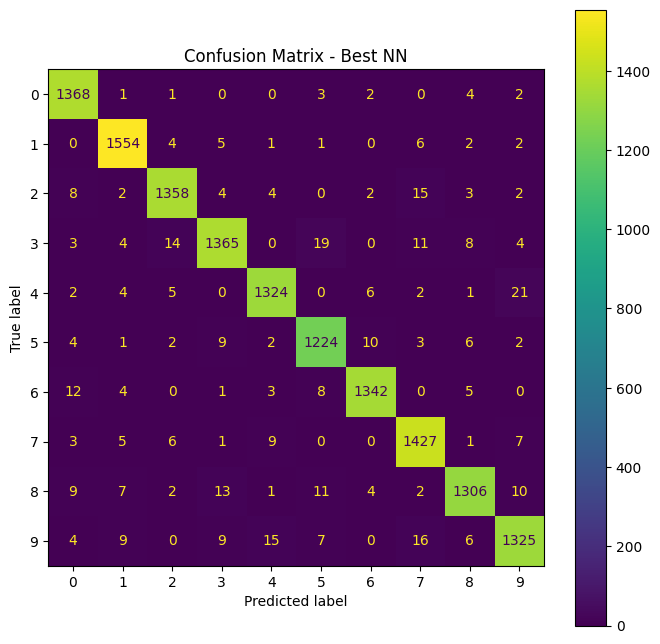

Total misclassified: 407


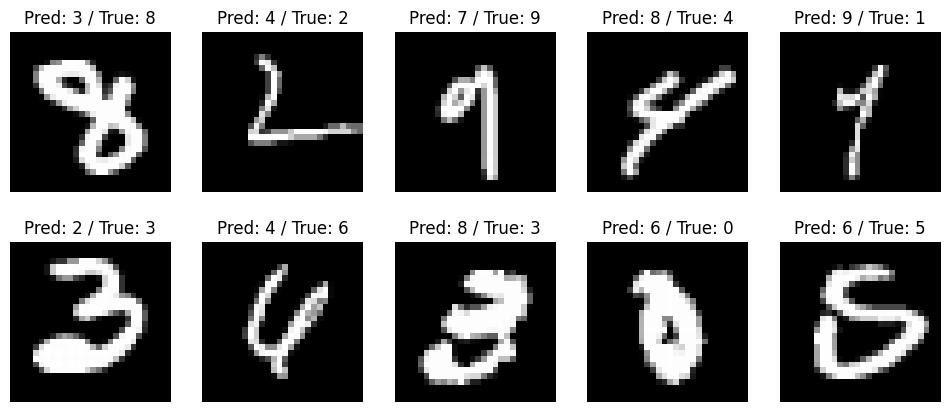

In [11]:
cm = confusion_matrix(y_true_nn, y_pred_nn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(8,8))
disp.plot(ax=ax)
plt.title('Confusion Matrix - Best NN')
plt.show()

# Show some misclassified examples
mis_idx = np.where(y_true_nn != y_pred_nn)[0]
print('Total misclassified:', len(mis_idx))

# Grab images from test dataset (original test dataset should be available as X_test / y_test or test_loader.dataset)
# Assuming test_loader.dataset is a TensorDataset of flattened images

dataset_for_vis = test_loader.dataset
fig, axes = plt.subplots(2,5, figsize=(12,5))
for i, ax in enumerate(axes.flat):
    if i >= len(mis_idx): break
    idx = mis_idx[i]
    # if dataset stores flattened images, reshape
    img_flat, true_label = dataset_for_vis[idx]
    if img_flat.ndim == 1:
        img = img_flat.reshape(28,28)
    else:
        img = img_flat.squeeze()
    ax.imshow(img, cmap='gray')
    ax.set_title(f"Pred: {y_pred_nn[idx]} / True: {y_true_nn[idx]}")
    ax.axis('off')
plt.show()

## C3 — Final Evaluation & Retraining Best Model on Train+Val


In [12]:
# Combine train + val into one dataset and retrain best model
try:
    X_train_flat; X_val_flat; y_train; y_val
    X_train_comb = torch.cat([X_train_flat, X_val_flat], dim=0)
    y_train_comb = torch.cat([y_train, y_val], dim=0)
    combined_loader = DataLoader(TensorDataset(X_train_comb, y_train_comb), batch_size=64, shuffle=True)
    final_model = make_ffnn(best_hidden)
    # train
    train_model_once(final_model, combined_loader, test_loader, epochs=30, learning_rate=0.01)
    final_acc, y_true_final, y_pred_final = evaluate_nn_on_loader(final_model, test_loader)
    print('Final test acc after retraining on train+val:', final_acc)
except NameError:
    print('Train/Val tensors not found in workspace; skip final retrain step or recreate tensors.')

Train/Val tensors not found in workspace; skip final retrain step or recreate tensors.


## Save results


In [13]:
# Save best model weights (optional)
try:
    torch.save(final_model.state_dict(), 'best_model_final.pt')
    print('Saved best_model_final.pt')
except NameError:
    print('Final model not trained — no file saved')

Final model not trained — no file saved


## End of Notebook